### Middleware

**Middleware** provides a way to more tightly control what happens inside the agent.**Middleware** is useful for the following:

- Tracking agent behavior with logging, analytics, and debugging.
- Transforming prompts, tool selections, and output formating.
- Addding retries, fallbacks, and early termination logic.
- Applying rate limits, guardrails, and PII Detection

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

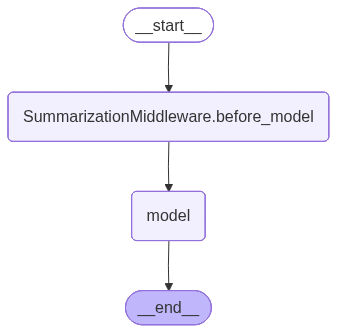

In [7]:
from langchain.agents import create_agent
from langchain.agents.middleware import SummarizationMiddleware
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages import HumanMessage, SystemMessage

# Agent with Message Based Summarization

agent = create_agent(
  model= "gpt-5",
  checkpointer= InMemorySaver(),
  middleware= [
    SummarizationMiddleware(
      model = "gpt-5",
      trigger=("messages", 10),
      keep=("messages", 4),
    )
  ]
)
agent

In [8]:
# Thread Id
config = {"configurable": {"thread_id": "test1"}}

In [9]:
# questions = [
#   "What is the capital of France?",
#   "What is the capital of Germany?",
#   "What is the capital of Italy?",
#   "What is the capital of Spain?",
#   "What is the capital of Portugal?",
# ]


questions = [
  "What is 2+2?",
  "What is 10*5?",
  "What is 100/2?",
  "What is 100/4?",
  "What is 100/5?",
  "What is 100/10?",
  "What is 100/20?",
  "What is 100/40?",
]

for question in questions:
  response = agent.invoke({"messages": [HumanMessage(content=question)]}, config=config)
  # print(response["messages"][-1].content)
  # print(f"Messages:{question} :{response["messages"][-1].content}")
  print(f"Messages:{question} :{response}")
  print(f"Messages: {len(response['messages'])}")



KeyboardInterrupt: 

In [5]:
from langchain.agents import create_agent
from langchain.agents.middleware import SummarizationMiddleware
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.tools import tool
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")



@tool
def search_hotels(city: str) -> str:
  """Search hotels - returs long response to use more tokens"""
  return f"""Hotels in {city}
  1. Grand Hotel - 5 star, $350/night, spa, pool, gym
  2. City Inn - 4 star, $180/night, business center
  3. Budget Stay - 3 star, $75/night, free wifi
  """
  
agent = create_agent(
  model= "gpt-5",
  tools= [search_hotels],
  checkpointer= InMemorySaver(),
  middleware= [
    SummarizationMiddleware(
      model= "gpt-5",
      trigger=("tokens", 550),
      keep=("tokens", 200),
      
    )
  ]
 
  
)

agent

# Token counter
def count_tokens(messages):
  total_chars = sum(len(m.content) for m in messages)
  total_tokens = total_chars / 4
  return total_tokens


  

In [6]:
# Run test 

cities = ["Paris", "London", "New York", "Tokyo", "Dubai", "Singapore"]
# Thread Id
config = {"configurable": {"thread_id": "test13"}}

for city in cities:
  response = agent.invoke({"messages": [HumanMessage(content=f"What are the hotels in {city}?")]}, config=config)
  
  tokens = count_tokens(response["messages"])
  print(f"{city} : ~{tokens} tokens, {len(response['messages'])} messages")
  print(f"{response['messages']}")

Paris : ~122.0 tokens, 4 messages
[HumanMessage(content='What are the hotels in Paris?', additional_kwargs={}, response_metadata={}, id='5d4a87e8-c6f6-4153-a0d1-d73235afa5b0'), AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 344, 'prompt_tokens': 138, 'total_tokens': 482, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 320, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cy1QWXsvCfNZ1S80babdlFeTiGQ2G', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019bbe1e-1024-7190-ac54-c98715f47305-0', tool_calls=[{'name': 'search_hotels', 'args': {'city': 'Paris'}, 'id': 'call_3pqjDieXEs8ZlmctblAn98JJ', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 13